In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Housing.csv')

df.shape

(545, 13)

In [3]:
def map_yes_or_no(df,columns):
    for col in columns:
        df[col]=df[col].map({'yes':1,'no':0})
    return df
columns_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


df = map_yes_or_no(df, columns_to_map)

In [4]:
df.isnull().sum();

In [5]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


In [6]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [8]:
NOC = df["furnishingstatus"].unique()
print("Number of Category in within This Feature")

print(len(NOC))

Number of Category in within This Feature
3


In [9]:
df = pd.get_dummies(df,columns=["furnishingstatus"])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [10]:
df.rename(columns=lambda x: x.replace('furnishingstatus_', ''), inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [11]:
df[['furnished', 'semi-furnished', 'unfurnished']] = df[['furnished', 'semi-furnished', 'unfurnished']].astype(int)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


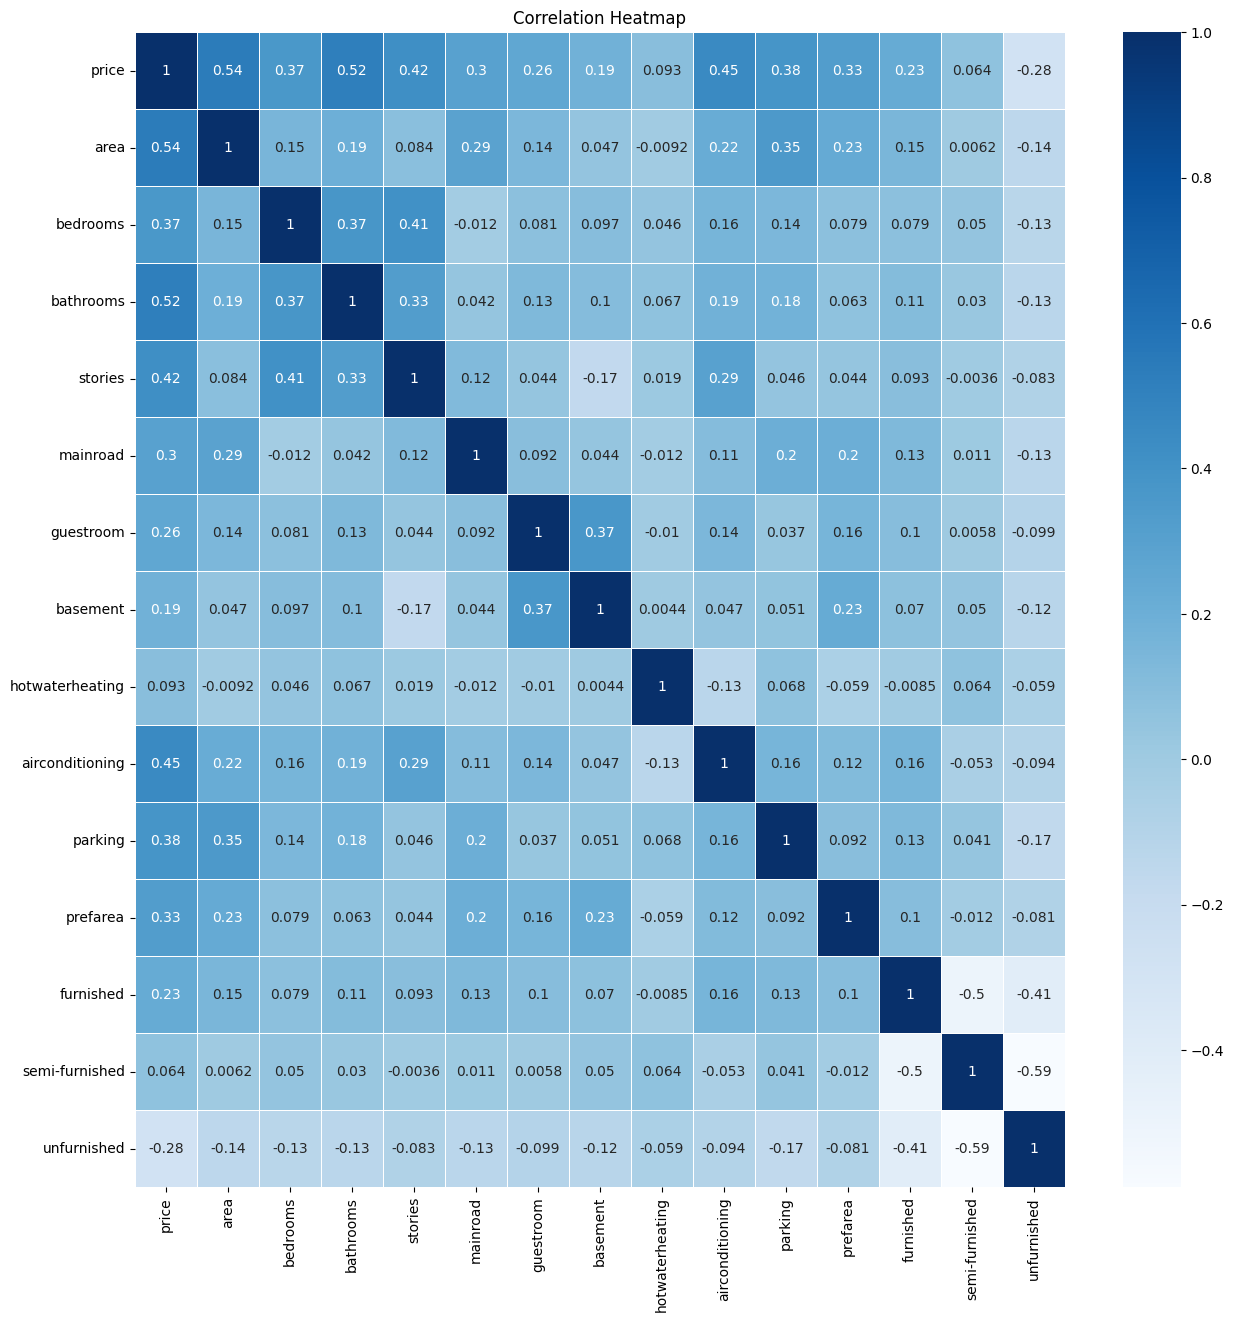

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True,cmap='Blues',linewidths=0.5)
# cmap='coolwarm', fmt=".2f", linewidths=0.5
plt.title('Correlation Heatmap')
plt.show()

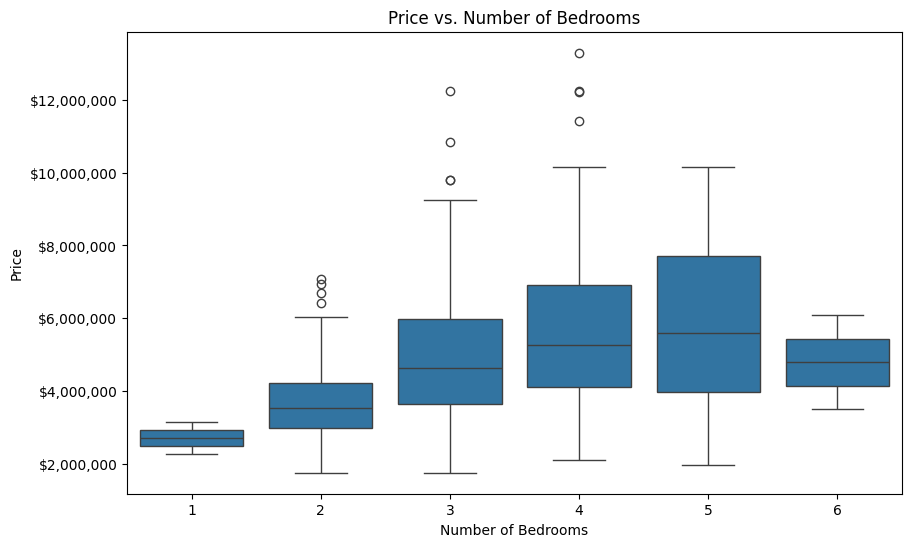

In [13]:

import matplotlib.ticker as mticker # imports the matplotlib.ticker module and assigns it to the alias 'mticker'

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}')) # Now that the module is imported and aliased as 'mticker' this line will execute without error
plt.show()


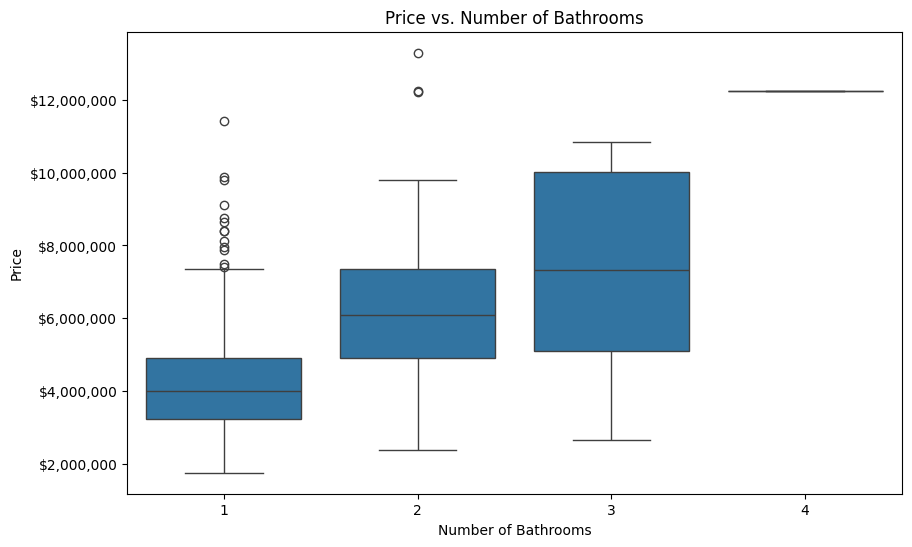

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

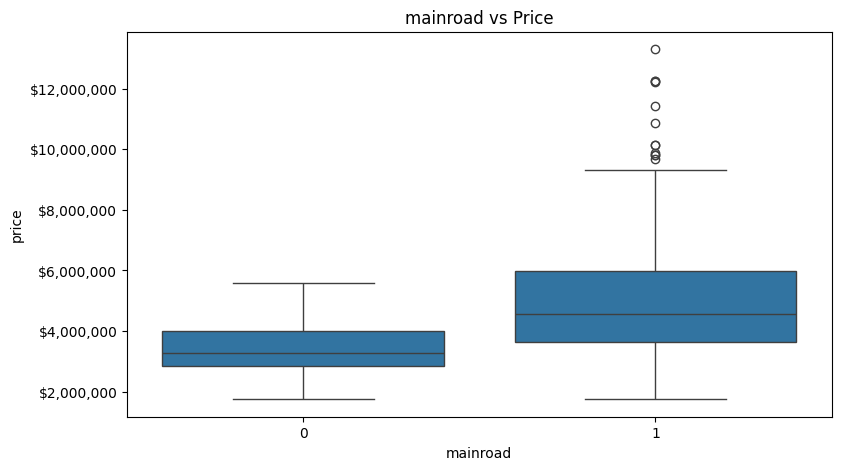

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('mainroad vs Price')
sns.boxplot(x=df.mainroad, y=df.price)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))


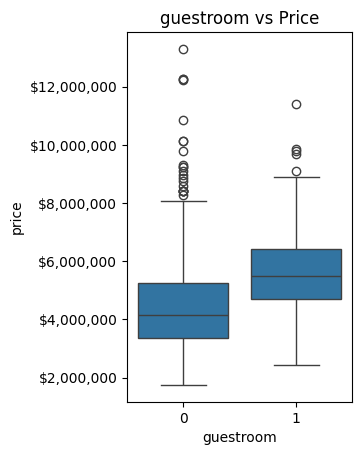

In [16]:
plt.subplot(1,2,2)

sns.boxplot(x=df.guestroom, y=df.price)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.title('guestroom vs Price')
plt.show()

In [17]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'semi-furnished'}>,
        <Axes: title={'center': 'unfurnished'}>, <Axes: >]], dtype=object)

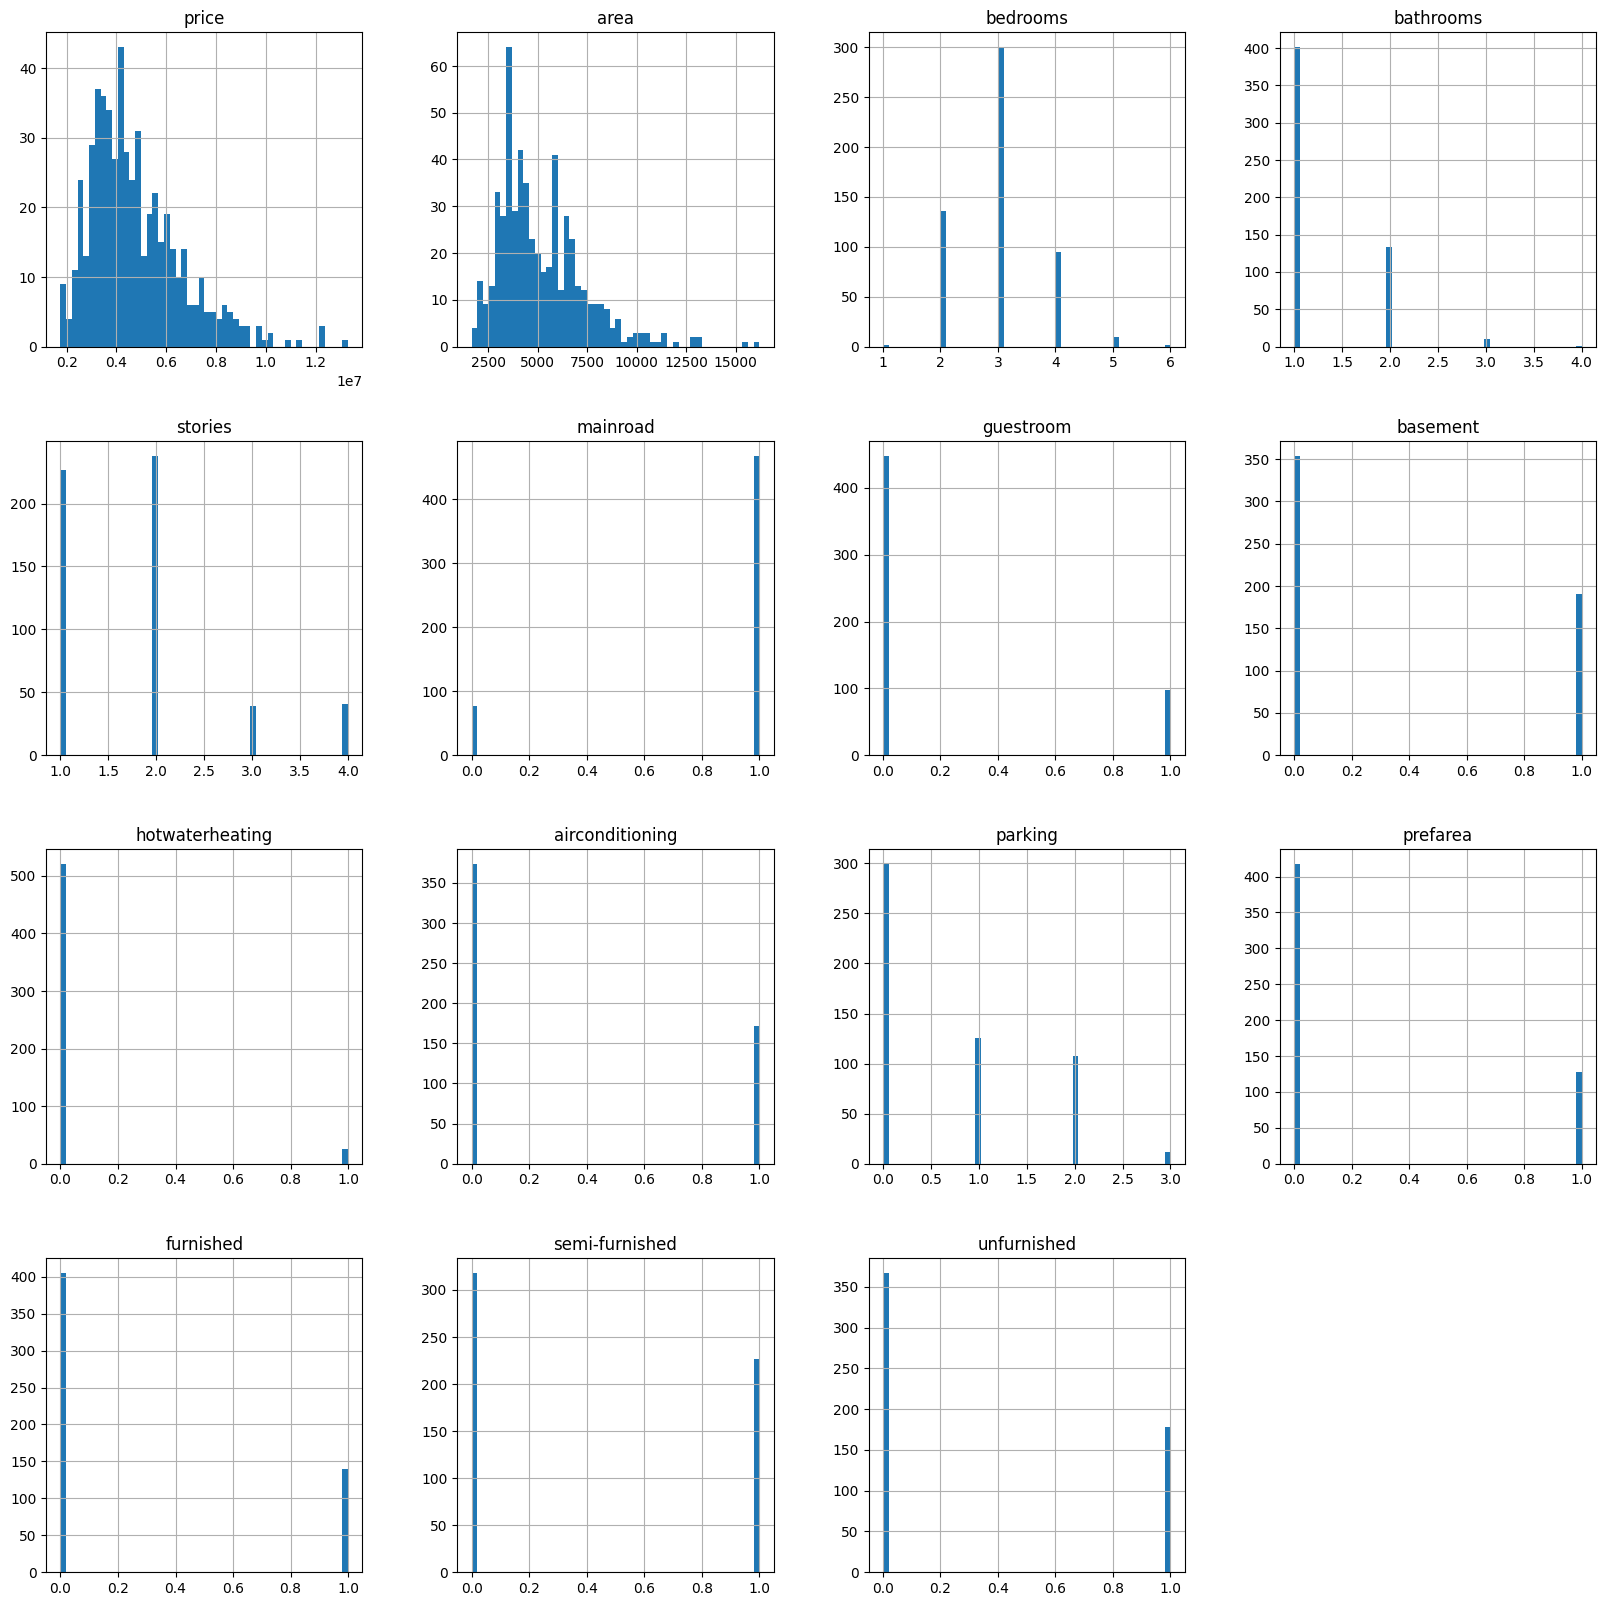

In [18]:
df.hist(bins=50,figsize=(20,20))

In [19]:
skewness = df.skew()
skewness = df.skew()

print("Skewness for each feature:\n", skewness)

Skewness for each feature:
 price              1.212239
area               1.321188
bedrooms           0.495684
bathrooms          1.589264
stories            1.082088
mainroad          -2.065410
guestroom          1.688419
basement           0.628590
hotwaterheating    4.353428
airconditioning    0.795748
parking            0.842062
prefarea           1.254361
furnished          1.115969
semi-furnished     0.339635
unfurnished        0.741509
dtype: float64


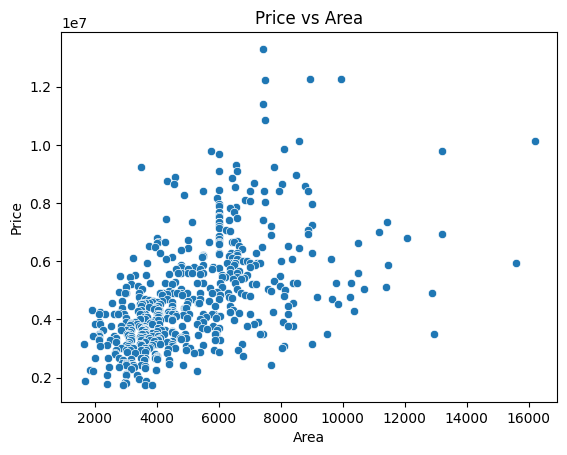

In [20]:
sns.scatterplot(x=df['area'], y=df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

In [21]:
X = df.drop('price', axis=1)
y = df['price']

scale = StandardScaler()
X = scale.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5032)

print(X.shape, X_train.shape, X_test.shape)

(545, 14) (436, 14) (109, 14)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score

linear_model_predict = model.predict(X_test)

Rscore = r2_score(y_test, linear_model_predict)
print(f"R squared error for Linear Regression:  {Rscore:.2f}")

R squared error for Linear Regression:  0.81


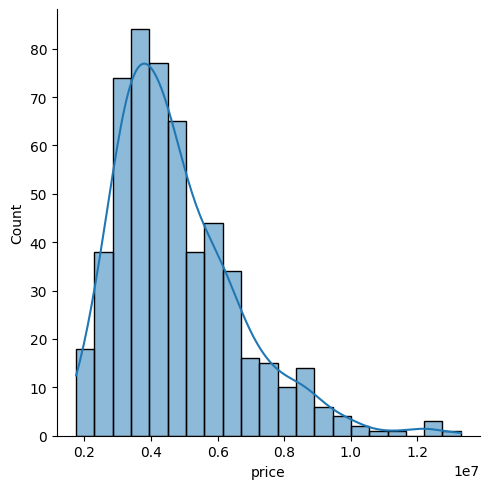

In [25]:
sns.displot(df['price'] , kde=True )
plt.show()

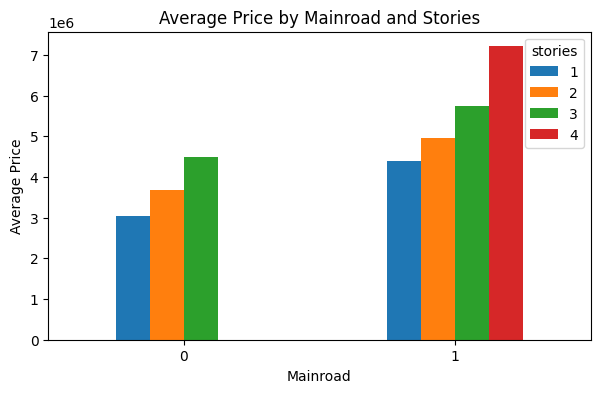

In [26]:
avg_price_stories = df.groupby(['mainroad', 'stories'])['price'].mean().unstack()

avg_price_stories.plot(kind='bar', figsize=(7, 4))
plt.xlabel('Mainroad')
plt.ylabel('Average Price')
plt.title('Average Price by Mainroad and Stories')
plt.xticks(rotation=0)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

<Axes: >

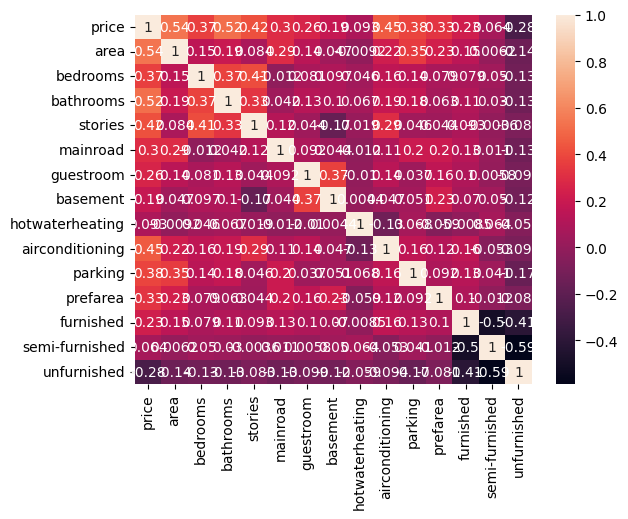

In [35]:
int_cols = df.select_dtypes(include=np.number).columns

sns.heatmap(df[int_cols].corr(), annot=True)